In [211]:
import pandas as pd
import numpy as np
from tqdm import notebook as nb
import pickle
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import zoom    

In [271]:
df_85 = pd.read_csv('data/X_85_v2.csv')
df_26 = pd.read_csv('data/X_26_v2.csv')
df_cr2 = pd.read_csv('data/X_cr2.csv')

In [272]:
df_cr2['year'] = np.array(df_cr2['year'] ) - 28
df_cr2 = df_cr2[df_cr2['bio1'].notna()]

In [273]:
np.shape(df_85)

(116644, 30)

In [274]:
np.shape(df_cr2)[0]/38

8556.0

In [664]:
cuencas = df_85['region'][0:2651]
lon = np.round_(df_85['lon'][0:2651],2)

In [217]:
for cuenca in ['arica', 'atacama', 'serena', 'maule', 'santiago']:
    for i in range(0, len(lon)):
        
        

0        maule
1        maule
2        maule
3        maule
4        maule
         ...  
2646    arica 
2647    arica 
2648    arica 
2649    arica 
2650    arica 
Name: region, Length: 2651, dtype: object

In [218]:
df_26 = df_26[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]
df_85 = df_85[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]
df_cr2 = df_cr2[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]

In [219]:
lon_cr2 = np.round_(np.sort(np.unique(df_cr2['lon'][0:8556])),3)
lon_rcp = np.round_(np.sort(np.unique(df_85['lon'][0:2651])),3)
lat_cr2 = np.round_(np.sort(np.unique(df_1988['lat'][0:8556])),3)
lat_rcp = np.round_(np.sort(np.unique(df_85['lat'][0:2651])),3)

# predict

In [220]:
filehandler = open('modelAll.obj', 'rb') 
modelAll = pickle.load(filehandler)

In [221]:
X_85_plant_c = df_85.values
X_26_plant_c = df_26.values
X_85_soil_c = df_85.values
X_26_soil_c = df_26.values

X_85_plant_n = df_85.values
X_26_plant_n = df_26.values
X_85_soil_n = df_85.values
X_26_soil_n = df_26.values

X_cr2_plant_c = df_cr2.values
X_cr2_plant_n = df_cr2.values
X_cr2_soil_c = df_cr2.values
X_cr2_soil_n = df_cr2.values

In [222]:
_1 = np.full(len(X_85_plant_c), 1)
_0 = np.full(len(X_85_plant_c), 0)

b_plant_n = np.array([_0, _1, _1, _0])
b_plant_c = np.array([_0, _1, _0, _1])
b_soil_n = np.array([_1, _0, _1, _0])
b_soil_c = np.array([_1, _0, _0, _1])

In [223]:
X_85_plant_n = np.concatenate((X_85_plant_n, b_plant_n.T), axis=1)
X_26_plant_n = np.concatenate((X_26_plant_n, b_plant_n.T), axis=1)
X_85_soil_c  = np.concatenate((X_85_soil_c, b_soil_c.T), axis=1)
X_26_soil_c = np.concatenate((X_26_soil_c, b_soil_c.T), axis=1)

X_85_plant_c = np.concatenate((X_85_plant_c, b_plant_c.T), axis=1)
X_26_plant_c = np.concatenate((X_26_plant_c, b_plant_c.T), axis=1)
X_85_soil_n = np.concatenate((X_85_soil_n, b_soil_n.T), axis=1)
X_26_soil_n = np.concatenate((X_26_soil_n, b_soil_n.T), axis=1)

In [224]:
_1 = np.full(len(X_cr2_plant_c), 1)
_0 = np.full(len(X_cr2_plant_c), 0)

b_plant_n = np.array([_0, _1, _1, _0])
b_plant_c = np.array([_0, _1, _0, _1])
b_soil_n = np.array([_1, _0, _1, _0])
b_soil_c = np.array([_1, _0, _0, _1])

In [225]:
X_cr2_plant_n = np.concatenate((X_cr2_plant_n, b_plant_n.T), axis=1)
X_cr2_plant_c = np.concatenate((X_cr2_plant_c, b_plant_c.T), axis=1)
X_cr2_soil_n = np.concatenate((X_cr2_soil_n, b_soil_n.T), axis=1)
X_cr2_soil_c = np.concatenate((X_cr2_soil_c, b_soil_c.T), axis=1)

In [226]:
y_c_soil_85 = modelAll.predict(X_85_soil_c)
y_c_soil_26 = modelAll.predict(X_26_soil_c)

y_c_plant_85 = modelAll.predict(X_85_plant_c)
y_c_plant_26 = modelAll.predict(X_26_plant_c)

y_n_soil_85 = modelAll.predict(X_85_soil_n)
y_n_soil_26 = modelAll.predict(X_26_soil_n)

y_n_plant_85 = modelAll.predict(X_85_plant_n)
y_n_plant_26 = modelAll.predict(X_26_plant_n)

In [227]:
y_n_plant_cr2 = modelAll.predict(X_cr2_plant_n)
y_c_plant_cr2 = modelAll.predict(X_cr2_plant_c)
y_n_soil_cr2 = modelAll.predict(X_cr2_soil_n)
y_c_soil_cr2 = modelAll.predict(X_cr2_soil_c)

In [228]:
np.shape(y_c_soil_85)

(2, 116644)

# ajustando

In [665]:
df = pd.DataFrame()
cr2 = [y_c_soil_cr2 , y_c_plant_cr2, y_n_soil_cr2 ,y_n_plant_cr2]
_85 = [y_c_soil_85, y_c_plant_85, y_n_soil_85, y_n_plant_85]
_26 = [y_c_soil_26, y_c_plant_26, y_n_soil_26, y_n_plant_26]
isos = ['c_soil', 'c_plant', 'n_soil', 'n_plant'] 
#print(np.shape(_85[0]))
for (y_cr2, y_85, y_26, iso) in zip(cr2, _85, _26, isos):
    
    y_cr2 = np.split(y_cr2[0], 38)
    x_cr2_1988 = np.mean(y_cr2[0:10][:], axis =0)
    #print(np.shape(y_85))
    y_85 = np.split(y_85[0], 44)
    x_rcp85_2050= np.mean(y_85[-10:][:], axis =0)

    y_26 = np.split(y_26[0], 44)
    x_rcp26_2050= np.mean(y_26[-10:][:], axis =0)

    small_a = zoom(x_cr2_1988, 0.309841)
    x_dif_85 = x_rcp85_2050 - small_a
    x_dif_26 = x_rcp26_2050 - small_a
    
    df[iso] = np.append(x_dif_26, x_dif_85)
    print([small_a[0] , x_rcp85_2050[0]])

c = np.append(cuencas, cuencas)
l = np.append(lon, lon)
print(np.shape(c))
print(np.shape(df[iso]))
rcp = []
df['Cuencas']= c
df['Longitude']= l

for i in x_dif_85:
    rcp.append('RCP 2.6')
for i in x_dif_26:
    rcp.append('RCP 8.5')
df['Scenario'] = rcp
    

[-25.895415539335676, -26.012421399026334]
[-23.494711141875523, -23.253829673067116]
[3.311265894372528, 3.3612992000913424]
[8.94739737210926, 9.123205505478152]
(5302,)
(5302,)


In [666]:
df

,c_soil,c_plant,n_soil,n_plant,Cuencas,Longitude,Scenario
0,-0.096303,0.036837,-0.076962,0.128855,maule,-71.35,RCP 2.6
1,-0.186477,0.012015,-0.222828,-0.641078,maule,-71.26,RCP 2.6
2,-0.606748,0.466063,-0.353530,-1.067917,maule,-70.99,RCP 2.6
3,-0.322868,0.232651,-0.667943,-1.733909,maule,-70.90,RCP 2.6
4,-0.276616,0.145871,0.371861,-0.202926,maule,-71.62,RCP 2.6
...,...,...,...,...,...,...,...
5297,2.154140,1.599186,0.588116,1.238574,arica,-69.64,RCP 8.5
5298,2.752950,1.637559,0.427859,1.472565,arica,-69.55,RCP 8.5
5299,3.899352,2.282460,0.273976,1.677071,arica,-69.46,RCP 8.5
5300,3.053451,1.703811,0.114960,1.487893,arica,-69.55,RCP 8.5


<Figure size 3900x3000 with 0 Axes>

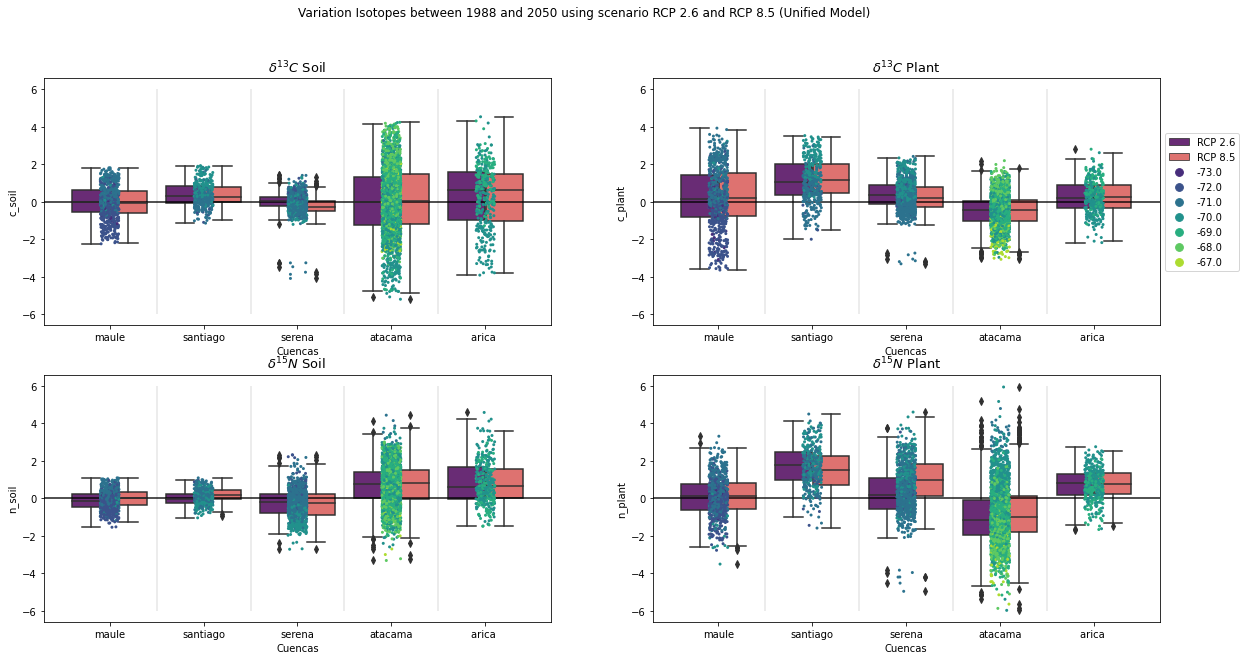

In [324]:
import seaborn as sns
# Draw Plot

plt.figure(figsize=(13,10), dpi= 300)
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,10)

fig.suptitle('Variation Isotopes between 1988 and 2050 using scenario RCP 2.6 and RCP 8.5 (Unified Model)')

iso = 'c_soil'
sns.boxplot(ax=ax[0,0], x='Cuencas', y=iso , data=df, hue='Scenario', palette='magma')
sns.stripplot(ax=ax[0,0], x='Cuencas', y=iso, data=df, hue='Longitude', size=3, jitter=1, palette='viridis')
for i in range(len(df['Cuencas'].unique())-1):
    ax[0,0].vlines(i+.5, -6, 6, linestyles='solid', colors='gray', alpha=0.2)
# Decoration
ax[0,0].set_title('$\delta^{13}C$ Soil ', fontsize=13)
ax[0,0].axhline(y=0, color='k', linestyle='-', alpha=0.9)
legend = ax[0,0].legend(title='Scenarios')
legend.remove()

iso = 'c_plant'
sns.boxplot(ax=ax[0,1], x='Cuencas', y=iso , data=df, hue='Scenario', palette='magma')
sns.stripplot(ax=ax[0,1], x='Cuencas', y=iso, data=df, hue='Longitude', size=3, jitter=1, palette='viridis')
for i in range(len(df['Cuencas'].unique())-1):
    ax[0,1].vlines(i+.5, -6, 6, linestyles='solid', colors='gray', alpha=0.2)
# Decoration
ax[0,1].set_title('$\delta^{13}C$ Plant ', fontsize=13)
ax[0,1].axhline(y=0, color='k', linestyle='-', alpha=0.9)
ax[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

iso = 'n_soil'
sns.boxplot(ax=ax[1,0], x='Cuencas', y=iso , data=df, hue='Scenario', palette='magma')
sns.stripplot(ax=ax[1,0], x='Cuencas', y=iso, data=df, hue='Longitude', size=3, jitter=1, palette='viridis')
for i in range(len(df['Cuencas'].unique())-1):
    ax[1,0].vlines(i+.5, -6, 6, linestyles='solid', colors='gray', alpha=0.2)
# Decoration
ax[1,0].set_title('$\delta^{15}N$ Soil ', fontsize=13)
ax[1,0].axhline(y=0, color='k', linestyle='-', alpha=0.9)
legend = ax[1,0].legend(title='Scenarios')
legend.remove()

iso = 'n_plant'
sns.boxplot(ax=ax[1,1], x='Cuencas', y=iso , data=df, hue='Scenario', palette='magma')
sns.stripplot(ax=ax[1,1], x='Cuencas', y=iso, data=df, hue='Longitude', size=3, jitter=1, palette='viridis')
for i in range(len(df['Cuencas'].unique())-1):
    ax[1,1].vlines(i+.5, -6, 6, linestyles='solid', colors='gray', alpha=0.2)
# Decoration
ax[1,1].set_title('$\delta^{15}N$ Plant ', fontsize=13)
ax[1,1].axhline(y=0, color='k', linestyle='-', alpha=0.9)
legend = ax[1,1].legend(title='Scenarios')
legend.remove()

plt.savefig('var_lon_1988.png')
plt.show()


## Map 2016

In [584]:
grid_lat_cr2 = np.round_(np.arange(np.min(lat_cr2), np.max(lat_cr2)+.05, 0.05), 3)
grid_lon_cr2 = np.round_(np.arange(np.min(lon_cr2), np.max(lon_cr2)+.05, 0.05), 3)

grid_lat_rcp = np.round_(np.arange(np.min(lat_rcp), np.max(lat_rcp)+0.09, 0.09), 3)
grid_lon_rcp = np.round_(np.arange(np.min(lon_rcp), np.max(lon_rcp), 0.09), 3)

In [668]:
cr2 = [y_c_soil_cr2 , y_c_plant_cr2, y_n_soil_cr2 ,y_n_plant_cr2]
_26 = [y_c_soil_26, y_c_plant_26, y_n_soil_26, y_n_plant_26]
_85 = [y_c_soil_85, y_c_plant_85, y_n_soil_85, y_n_plant_85]
dif_26 = [df['c_soil'].values[0:2651], df['c_plant'].values[0:2651], df['n_soil'].values[0:2651], df['n_plant'].values[0:2651]]
dif_85 = [df['c_soil'].values[-2651:], df['c_plant'].values[-2651:], df['n_soil'].values[-2651:], df['n_plant'].values[-2651:]]

zs = []
for i in range(0,4):
    y = cr2[i]
    y = np.split(y[0], 38)
    y = np.mean(y[0:10][:], axis =0)
    z = get_z(y, grid_lat_cr2, grid_lon_cr2, df_cr2, 8556)
    zs.append(z)
    
    y = cr2[i]
    y = np.split(y[0], 38)
    y = np.mean(y[-10:][:], axis =0)
    z = get_z(y, grid_lat_cr2, grid_lon_cr2, df_cr2, 8556)
    zs.append(z)

    y = _26[i]
    y = np.split(y[0], 44)
    y = np.mean(y[-10:][:], axis =0)
    z = get_z(y, grid_lat_rcp, grid_lon_rcp, df_26, 2651)
    zs.append(z)

    y = _85[i]
    y = np.split(y[0], 44)
    y = np.mean(y[-10:][:], axis =0)
    z = get_z(y, grid_lat_rcp, grid_lon_rcp, df_85, 2651)
    zs.append(z)
    
    y = dif_26[i]
    z = get_z(y, grid_lat_rcp, grid_lon_rcp, df_26, 2651)
    zs.append(z)

    y = dif_85[i]
    z = get_z(y, grid_lat_rcp, grid_lon_rcp, df_85, 2651)
    zs.append(z)
    

[-36.525 -36.475 -36.475 ... -17.575 -17.575 -17.525]


<ipython-input-559-0c3fbf5aa97c>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0, len(lat))):


  0%|          | 0/8556 [00:00<?, ?it/s]

[-36.525 -36.475 -36.475 ... -17.575 -17.575 -17.525]


  0%|          | 0/8556 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.525 -36.475 -36.475 ... -17.575 -17.575 -17.525]


  0%|          | 0/8556 [00:00<?, ?it/s]

[-36.525 -36.475 -36.475 ... -17.575 -17.575 -17.525]


  0%|          | 0/8556 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.525 -36.475 -36.475 ... -17.575 -17.575 -17.525]


  0%|          | 0/8556 [00:00<?, ?it/s]

[-36.525 -36.475 -36.475 ... -17.575 -17.575 -17.525]


  0%|          | 0/8556 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.525 -36.475 -36.475 ... -17.575 -17.575 -17.525]


  0%|          | 0/8556 [00:00<?, ?it/s]

[-36.525 -36.475 -36.475 ... -17.575 -17.575 -17.525]


  0%|          | 0/8556 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

[-36.5  -36.5  -36.5  ... -17.69 -17.6  -17.6 ]


  0%|          | 0/2651 [00:00<?, ?it/s]

In [669]:
np.shape(zs)

C:\Users\bmati\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(24,)

In [559]:
def get_z(y, grid_lat, grid_lon, df, n):
    
    lat = np.array(np.round_(df['lat'][0:n], 3))
    lon = np.array(np.round_(df['lon'][0:n], 3))
    print(lat)
    z=np.empty((len(grid_lat),len(grid_lon)))
    z[:] = np.nan
    for i in tqdm(range(0, len(lat))):
        contiene_lat, contiene_lon = False, False
        
        for lat_i in range(0, len(grid_lat)):
            if grid_lat[lat_i]==lat[i]:
                #print(0)
                index_lat = lat_i
                contiene_lat = True
                for lon_i in range(0, len(grid_lon)):
                    if grid_lon[lon_i]==lon[i]:
                        #print(1)
                        index_lon = lon_i
                        contiene_lon = True
                        z[index_lat][index_lon] = y[i]
             
    return z

In [401]:
from tqdm import tqdm_notebook as tqdm

# Plot

In [428]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cf

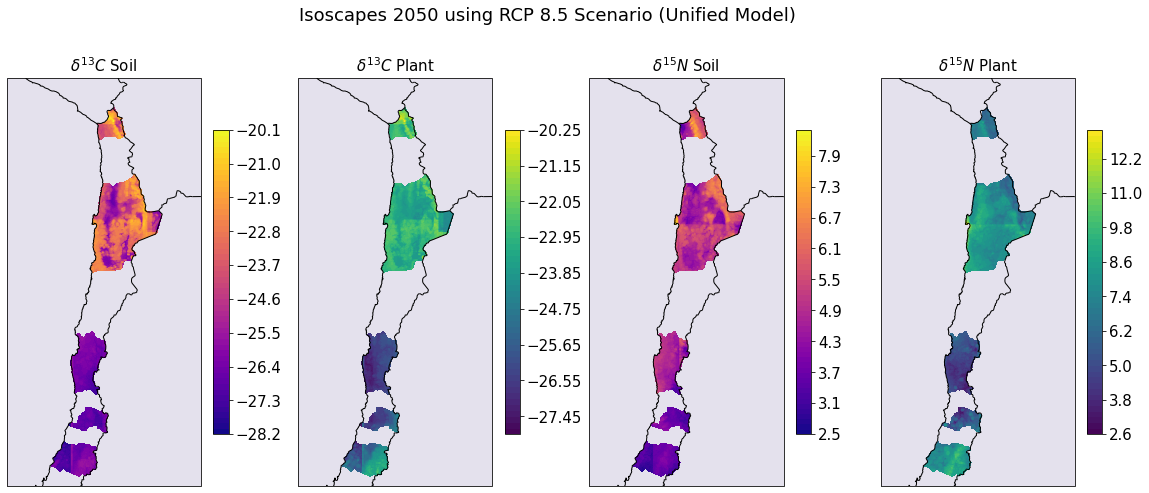

In [488]:
fig, ax = plt.subplots(nrows=1,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,8))

fig.suptitle('Isoscapes 2050 using RCP 8.5 Scenario (Unified Model)')

ax = ax.flatten()
ax[0].set_title('$\delta^{13}C$ Soil ', fontsize=15)
ax[0].set_extent([-65, -75, -37, -16])
z1 = ax[0].contourf(lons, lats, sst[0], 60,
             transform=ccrs.PlateCarree(), cmap='plasma')
ax[0].coastlines()
ax[0].set_facecolor('#e4e1ed')
ax[0].add_feature(cf.BORDERS)

ax[1].set_title('$\delta^{13}C$ Plant ', fontsize=15)
ax[1].set_extent([-65, -75, -37, -16])
z2 = ax[1].contourf(lons, lats, sst[1], 60,
             transform=ccrs.PlateCarree())
ax[1].coastlines()
ax[1].set_facecolor('#e4e1ed')
ax[1].add_feature(cf.BORDERS)

ax[2].set_title('$\delta^{15}N$ Soil ', fontsize=15)
ax[2].set_extent([-65, -75, -37, -16])
z3 = ax[2].contourf(lons, lats, sst[2], 60,
             transform=ccrs.PlateCarree(), cmap='plasma')
ax[2].coastlines()
ax[2].set_facecolor('#e4e1ed')
ax[2].add_feature(cf.BORDERS)

ax[3].set_title('$\delta^{15}N$ Plant ', fontsize=15)
ax[3].set_extent([-65, -75, -37, -16])
z4 = ax[3].contourf(lons, lats, sst[3], 60,
             transform=ccrs.PlateCarree())
ax[3].coastlines()
ax[3].set_facecolor('#e4e1ed')
ax[3].add_feature(cf.BORDERS)

plt.colorbar(z1, ax=ax[0], shrink=.7)
plt.colorbar(z2, ax=ax[1], shrink=.7)
plt.colorbar(z3, ax=ax[2], shrink=.7)
plt.colorbar(z4, ax=ax[3], shrink=.7)

#plt.savefig('maps_2050_85')
plt.show()

In [661]:
isotopo = ['$\delta^{13}C$ Soil ', '$\delta^{13}C$ Soil ', '$\delta^{13}C$ Soil ', 
           '$\delta^{13}C$ Plant ','$\delta^{13}C$ Plant ','$\delta^{13}C$ Plant ',
           '$\delta^{15}N$ Soil ', '$\delta^{15}N$ Soil ','$\delta^{15}N$ Soil ',
           '$\delta^{15}N$ Plant ', '$\delta^{15}N$ Plant ','$\delta^{15}N$ Plant ']

<ipython-input-662-9c267ced7c10>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sst = np.array(zs)


(383,)
(2, 6)


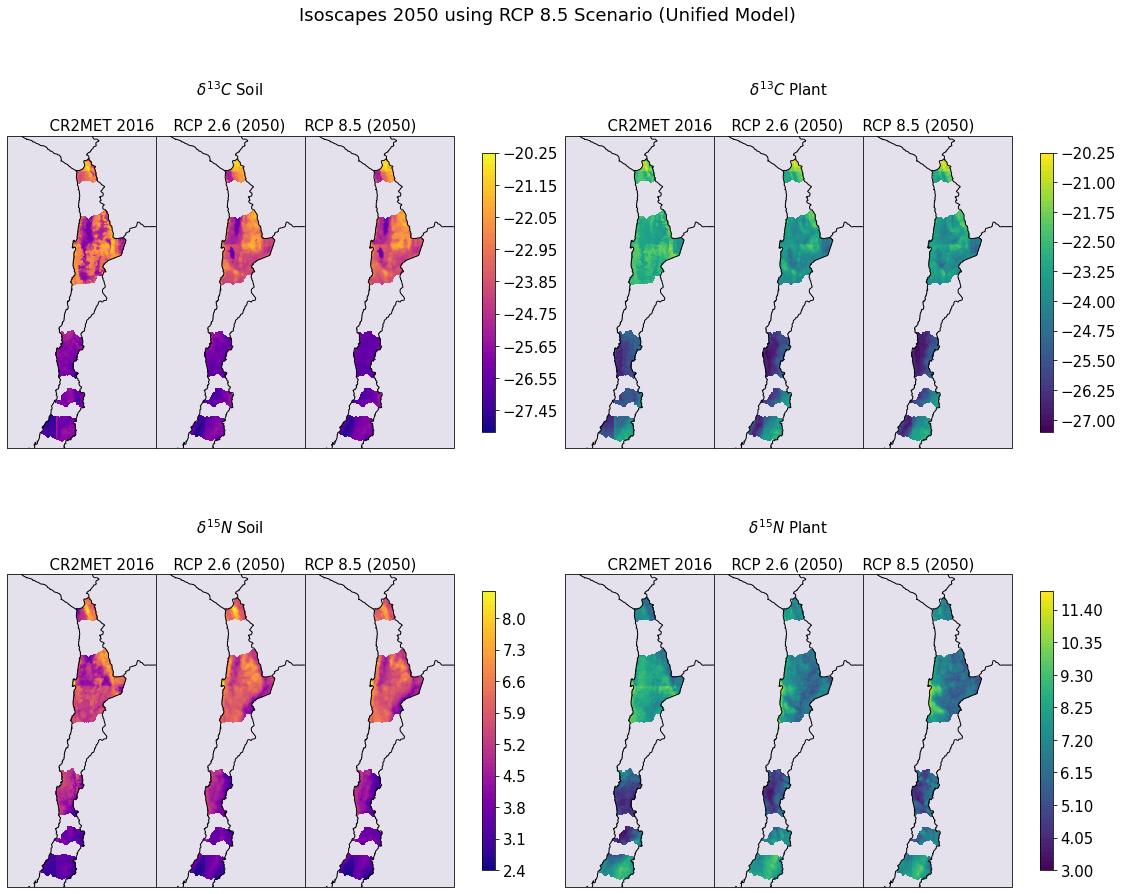

In [662]:
sst = np.array(zs)
np.shape(zs[0])

lons_crp, lats_crp, lons_rcp, lats_rcp = [], [], [], []
#lons_crp = np.append(grid_lon_cr2, np.array([-60]))
lons_crp = grid_lon_cr2
lats_crp = np.append(grid_lat_cr2, np.array([-40]))
lats_crp = np.append(lats_crp, np.array([-40]))

#lons_rcp = np.append(grid_lon_rcp, np.array([-60]))
lons_rcp = grid_lon_rcp
lats_rcp = np.append(grid_lat_rcp, np.array([-40]))
lats_rcp = np.append(lats_rcp, np.array([-40]))
print(np.shape(lats_crp))

fig, ax = plt.subplots(nrows=2,ncols=6,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,15))
print(np.shape(ax))
fig.suptitle('Isoscapes 2050 using RCP 8.5 Scenario (Unified Model)')

ax = ax.flatten()
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=0, hspace=0.1)
for j in [0,3,6,9]:
    if j==0 or j==6:
        color = 'plasma'
    else:
        color='viridis'
    
    norm = np.append(sst[j+0], sst[j+1])
    norm = np.append(norm, sst[j+2])
    bmin_crp =np.empty(len(grid_lon_cr2))
    bmin_crp[:] = np.min(norm)
    bmax_crp=np.empty(len(grid_lon_cr2))
    bmax_crp[:] = np.max(norm)
    bmin_rcp =np.empty(len(grid_lon_rcp))
    bmin_rcp[:] = np.min(norm)
    bmax_rcp=np.empty(len(grid_lon_rcp))
    bmax_rcp[:] = np.max(norm)
    sst[j+0] = np.append(sst[j+0], [bmin_crp,bmax_crp], axis=0)
    sst[j+1] = np.append(sst[j+1], [bmin_rcp,bmax_rcp], axis=0)
    sst[j+2] = np.append(sst[j+2], [bmin_rcp,bmax_rcp], axis=0)
    #####################################################
    ax[1+j].set_title(isotopo[j] + '\n \n  CR2MET 2016    RCP 2.6 (2050)    RCP 8.5 (2050) ', fontsize=15)
    ax[0+j].set_extent([-65, -75, -37, -16])
    z1 = ax[0+j].contourf(lons_crp, lats_crp, sst[j+0], 60,
                 transform=ccrs.PlateCarree(), cmap=color)
    ax[0+j].coastlines()
    ax[0+j].set_facecolor('#e4e1ed')
    ax[0+j].add_feature(cf.BORDERS)
    
    #######################################################
    #ax[1+j].set_title(isotopo[j+1] + '\n \n  CR2MET 2016    RCP 2.6 (2050)    RCP 8.5 (2050) ', fontsize=15)
    ax[1+j].set_extent([-65, -75, -37, -16])
    z2 = ax[1+j].contourf(lons_rcp, lats_rcp, sst[j+1], 60,
                 transform=ccrs.PlateCarree(), cmap=color)
    ax[1+j].coastlines()
    ax[1+j].set_facecolor('#e4e1ed')
    ax[1+j].add_feature(cf.BORDERS)
    
    ##################################################
    #ax[1+j].set_title(isotopo[j+2] + '\n \n  CR2MET 2016    RCP 2.6 (2050)    RCP 8.5 (2050) ', fontsize=15)
    ax[2+j].set_extent([-65, -75, -37, -16])
    z3 = ax[2+j].contourf(lons_rcp, lats_rcp, sst[j+2], 60,
                 transform=ccrs.PlateCarree(), cmap=color)
    ax[2+j].coastlines()
    ax[2+j].set_facecolor('#e4e1ed')
    ax[2+j].add_feature(cf.BORDERS)

    plt.colorbar(z2,  ax=[ax[0+j], ax[1+j], ax[2+j]], shrink=.7)

plt.savefig('map_all_2016.png')
plt.show()

<ipython-input-699-1c0c5c551872>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sst = np.array(zs[-12:])


(383,)
(2, 6)


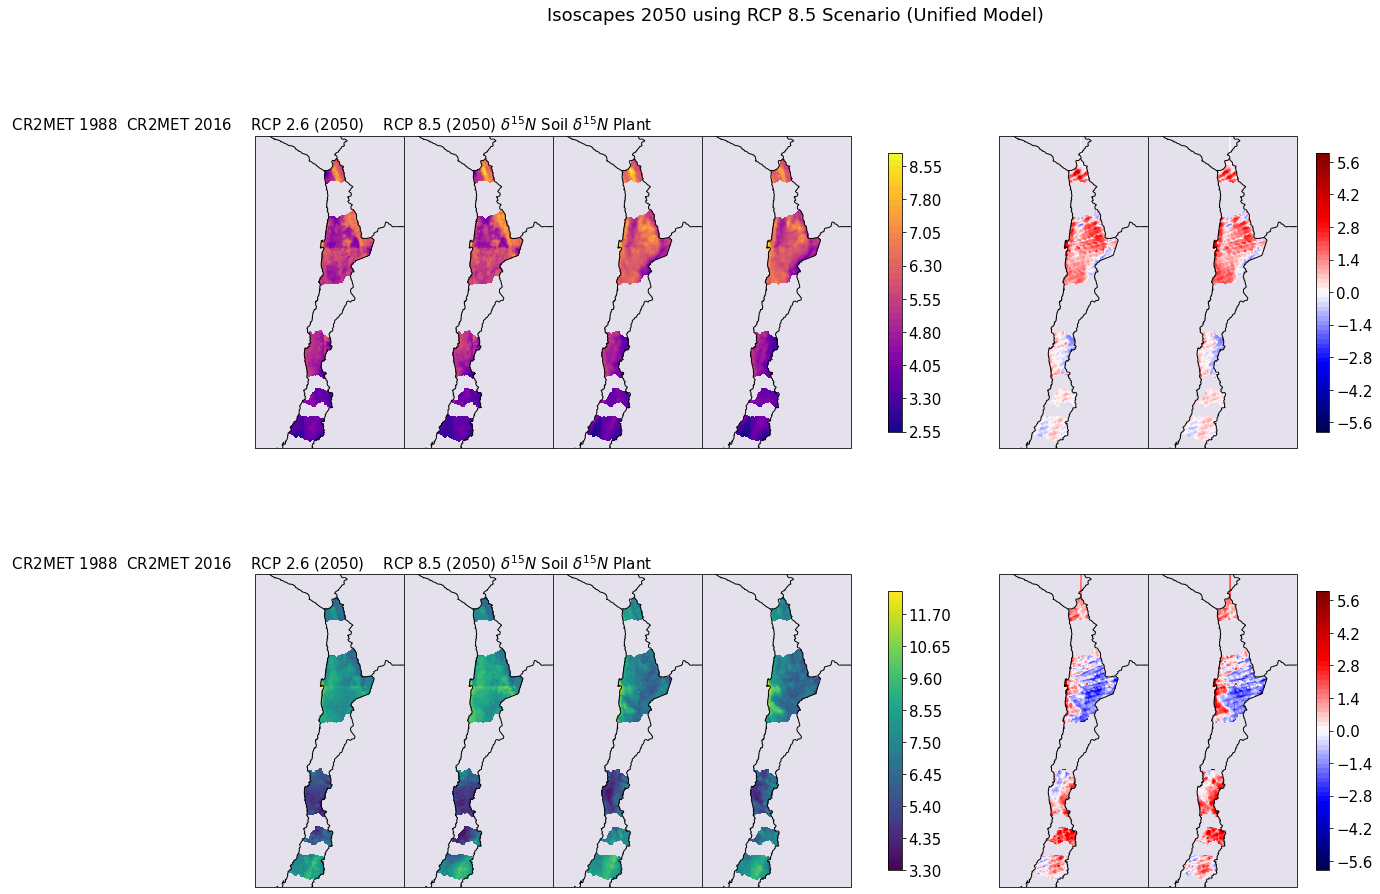

In [699]:
sst = np.array(zs[-12:])
np.shape(zs[0])

lons_crp, lats_crp, lons_rcp, lats_rcp = [], [], [], []
#lons_crp = np.append(grid_lon_cr2, np.array([-60]))
lons_crp = grid_lon_cr2
lats_crp = np.append(grid_lat_cr2, np.array([80]))
lats_crp = np.append(lats_crp, np.array([80]))

#lons_rcp = np.append(grid_lon_rcp, np.array([-60]))
lons_rcp = grid_lon_rcp
lats_rcp = np.append(grid_lat_rcp, np.array([80]))
lats_rcp = np.append(lats_rcp, np.array([80]))
print(np.shape(lats_crp))

fig, ax = plt.subplots(nrows=2,ncols=6,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,15))
print(np.shape(ax))
fig.suptitle('Isoscapes 2050 using RCP 8.5 Scenario (Unified Model)')

ax = ax.flatten()
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=0, hspace=0.1)
for j in [0,6]:
    
    if j==0:
        color = 'plasma'
    else:
        color='viridis'
    
    norm = np.append(sst[j], sst[j+1])
    norm = np.append(norm, sst[j+2])
    norm = np.append(norm, sst[j+3])
    
    bmin_crp =np.empty(len(grid_lon_cr2))
    bmin_crp[:] = np.min(norm)
    bmax_crp=np.empty(len(grid_lon_cr2))
    bmax_crp[:] = np.max(norm)
    bmin_rcp =np.empty(len(grid_lon_rcp))
    bmin_rcp[:] = np.min(norm)
    bmax_rcp=np.empty(len(grid_lon_rcp))
    bmax_rcp[:] = np.max(norm)
    
    min_rcp=np.empty(len(grid_lon_rcp))
    max_rcp=np.empty(len(grid_lon_rcp))
    min_rcp[:]= -6.0
    max_rcp[:]= 6.0
    
    sst[j+0] = np.append(sst[j+0], [bmin_crp,bmax_crp], axis=0)
    sst[j+1] = np.append(sst[j+1], [bmin_crp,bmax_crp], axis=0)
    sst[j+2] = np.append(sst[j+2], [bmin_rcp,bmax_rcp], axis=0)
    sst[j+3] = np.append(sst[j+3], [bmin_rcp,bmax_rcp], axis=0)
    
    sst[j+4] = np.append(sst[j+4], [min_rcp,max_rcp], axis=0)
    sst[j+5] = np.append(sst[j+5], [min_rcp,max_rcp], axis=0)
    
    #####################################################
    ax[0+j].set_title( '\n \n CR2MET 1988  CR2MET 2016    RCP 2.6 (2050)    RCP 8.5 (2050) $\delta^{15}N$ Soil $\delta^{15}N$ Plant', fontsize=15)
    #1988
    ax[0+j].set_extent([-65, -75, -37, -16])
    z1 = ax[0+j].contourf(lons_crp, lats_crp, sst[j+0], 60,
                 transform=ccrs.PlateCarree(), cmap=color)
    ax[0+j].coastlines()
    ax[0+j].set_facecolor('#e4e1ed')
    ax[0+j].add_feature(cf.BORDERS)
    
    #######################################################
    #2016
    ax[1+j].set_extent([-65, -75, -37, -16])
    z2 = ax[1+j].contourf(lons_crp, lats_crp, sst[j+1], 60,
                 transform=ccrs.PlateCarree(), cmap=color)
    ax[1+j].coastlines()
    ax[1+j].set_facecolor('#e4e1ed')
    ax[1+j].add_feature(cf.BORDERS)
    
    ##################################################
    #RCP2.6
    ax[2+j].set_extent([-65, -75, -37, -16])
    z3 = ax[2+j].contourf(lons_rcp, lats_rcp, sst[j+2], 60,
                 transform=ccrs.PlateCarree(), cmap=color)
    ax[2+j].coastlines()
    ax[2+j].set_facecolor('#e4e1ed')
    ax[2+j].add_feature(cf.BORDERS)
    
    #RCP8.5
    ax[3+j].set_extent([-65, -75, -37, -16])
    z3 = ax[3+j].contourf(lons_rcp, lats_rcp, sst[j+3], 60,
                 transform=ccrs.PlateCarree(), cmap=color)
    ax[3+j].coastlines()
    ax[3+j].set_facecolor('#e4e1ed')
    ax[3+j].add_feature(cf.BORDERS)

    plt.colorbar(z3,  ax=[ax[0+j], ax[1+j], ax[2+j], ax[3+j]], shrink=.7)
    
    
    ##################################################
    # DIF RCP2.6
    ax[4+j].set_extent([-65, -75, -37, -16])
    z3 = ax[4+j].contourf(lons_rcp, lats_rcp, sst[j+4], 60,
                 transform=ccrs.PlateCarree(), cmap='seismic')
    ax[4+j].coastlines()
    ax[4+j].set_facecolor('#e4e1ed')
    ax[4+j].add_feature(cf.BORDERS)
    
    # DIF RCP8.5
    ax[5+j].set_extent([-65, -75, -37, -16])
    z2 = ax[5+j].contourf(lons_rcp, lats_rcp, sst[j+5], 60,
                 transform=ccrs.PlateCarree(), cmap='seismic')
    ax[5+j].coastlines()
    ax[5+j].set_facecolor('#e4e1ed')
    ax[5+j].add_feature(cf.BORDERS)

    plt.colorbar(z2,  ax=[ax[j+4], ax[j+5]], shrink=.7)
    

plt.savefig('map_nitrogeno_dif.pdf')
plt.show()

array([-67.325, -67.275, -67.225, -67.175, -67.125, -67.075, -67.025,
       -60.   , -60.   , -60.   ])